In [1]:
#!/usr/bin/env python

In [2]:
from __future__ import print_function

import argparse
import csv
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import keras
    
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import itertools

from keras import backend as K
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import History 

from keras.datasets import cifar10

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import rmsprop
from keras.optimizers import SGD

from PIL import Image

import skimage.data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import os

from keras_sequential_ascii import sequential_model_to_ascii_printout

import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys

sys.stdout.flush()

import convnet_image_utils
from importlib import reload
reload(convnet_image_utils)
from convnet_image_utils import ProjectX

# Allow image embeding in notebook
%matplotlib inline

Using TensorFlow backend.


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
X = ProjectX()

model_dir = 'transfer_learning_union_VGG16_bw-Adam-5794-224x224-109'
X.image_dir = image_dir = '/home/joeantol/joeantolwork/project-x/data/union/gunks/trapps/trainval'

In [10]:
model_stats = X.load_the_model(model_dir)

Loaded trained model from /home/joeantol/joeantolwork/project-x/saved_models/transfer_learning_union_VGG16_bw-Adam-5794-224x224-109 
Loaded evals...
Loaded history...
Loaded pred...
Loaded times...
Loaded label_map...


In [6]:
model_stats['eval'], model_stats['image_width'], model_stats['image_height']

([1.3262545020288183, 0.67126833482278225], 224, 224)

In [7]:
model = model_stats['model']

In [11]:
X.image_width  = model_stats['image_width']
X.image_height = model_stats['image_height']
X.batch_size   = 32

X.mean, X.std = X.sample_mean_and_std(batch_size=500)

preproc_func = X.normalize

datagen = ImageDataGenerator(preprocessing_function = preproc_func)
val_gen   = X.create_generators(datagen, os.path.join(image_dir, 'validation'))

# vg.reset()
labels = list(sorted(val_gen.class_indices.values()))

Found 4632 images belonging to 47 classes.
Reading existing stats file...
Found 1159 images belonging to 47 classes.


In [17]:
# pred = model.predict_generator(val_gen, verbose=1)
# X.mean, X.std
val_gen.num_classes, d

(47, None)

In [89]:
eval_scores = model.evaluate_generator(val_gen)
eval_scores

[1.3326787508387725, 0.67213114756669745]

In [ ]:
label_names = list(sorted(val_gen.class_indices.keys()))
label_names

In [125]:
# confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

# cm = confusion_matrix(val_gen.classes, pred.argmax(axis=1), labels=labels)
cm = confusion_matrix(val_gen.classes, pred.argmax(axis=1))

cm[0:10]

array([[0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 2, 3, 4,
        2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 3, 2, 0, 1, 0, 0,
        0, 0, 3],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 0, 0, 3, 1, 0, 2, 1, 0, 0, 1, 0,
        0, 3, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1,
        1, 0, 0],
       [1, 0, 2, 1, 2, 0, 0, 1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 3,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0,
        0, 1, 1],
       [2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 3,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0,
        0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
        0, 0, 0],
    

Confusion matrix, without normalization
[[0 0 0 ..., 0 0 3]
 [1 1 0 ..., 0 1 0]
 [0 0 1 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 1 0 0]
 [1 0 1 ..., 0 0 0]]


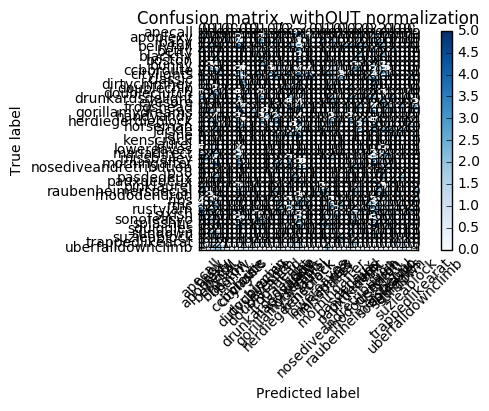

In [123]:
plt.figure()
plot_confusion_matrix(cm, classes=label_names, normalize=False,
                      title='Confusion matrix, withOUT normalization')

In [93]:
# confusion = tf.confusion_matrix(labels=y_, predictions=y, num_classes=num_classes)

con = tf.confusion_matrix(val_gen.classes, pred.argmax(axis=1))

sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[0 0 0 ..., 0 0 3]
 [1 1 0 ..., 0 1 0]
 [0 0 1 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 1 0 0]
 [1 0 1 ..., 0 0 0]]


In [100]:
cm[0]

array([0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 2, 3, 4, 2,
       3, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 3, 2, 0, 1, 0, 0, 0, 0,
       3])